# **集群分析**

# 一、階層式集群分析

In [ ]:
#上傳資料
import pandas as pd
df=pd.read_excel('clu.xlsx')
df.head()

,Sample,Chinese,English,Mathematics,Physics
0,1,90,90,95,95
1,2,95,90,95,90
2,3,95,95,95,95
3,4,90,95,95,95
4,5,95,90,90,90


In [ ]:
#輸入自變數/特徵
X=df[['Chinese','English','Mathematics','Physics']] 

#進行Hierarchy cluster analysis (AgglomerativeClustering)

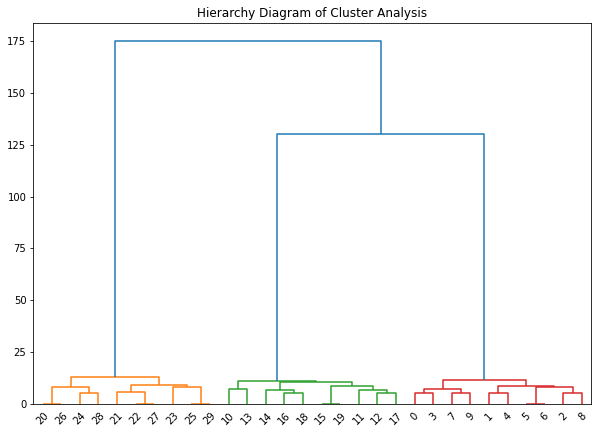

In [ ]:
#繪製樹狀圖
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Hierarchy Diagram of Cluster Analysis")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clus1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hcluster=clus1.fit_predict(X)
y_hcluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

#二、非階層式集群分析：K-mean分析法

In [ ]:
df2=pd.read_excel('efa.xlsx')
df2.head()

,Chin,Eng,Math,Phy
0,90,92,91,90
1,95,90,96,90
2,92,87,93,92
3,98,93,99,93
4,90,88,91,90


In [ ]:
X2=df2[['Chin','Eng','Math','Phy']] 

In [ ]:
#進行K-mean分析，並取K=3
from sklearn.cluster import KMeans
Clus2 = KMeans(n_clusters=3,random_state=5)
Clus2.fit(X2)

KMeans(n_clusters=3, random_state=5)

In [ ]:
#分類結果
y_kmeans = Clus2.predict(X2)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

計算各集群在各變數之平均數、各集群之樣本數及樣本比例

In [ ]:
df2['cluster']=y_kmeans
df2.head()

,Chin,Eng,Math,Phy,cluster
0,90,92,91,90,2
1,95,90,96,90,2
2,92,87,93,92,2
3,98,93,99,93,2
4,90,88,91,90,2


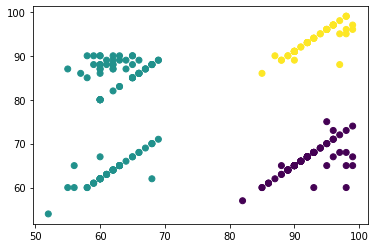

In [ ]:
#利用散佈圖比較不同集群學生在國文、數學的差異
plt.scatter(df2['Chin'],df2['Math'],c=y_kmeans)

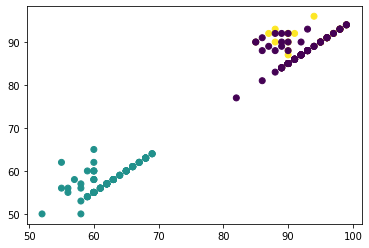

In [ ]:
#利用散佈圖比較不同集群學生在國文、英文的差異
plt.scatter(df2['Chin'],df2['Eng'],c=y_kmeans)

In [ ]:
#計算各集群在各變數之平均數
a=df2.groupby('cluster').mean()
b=a[['Chin','Eng','Math','Phy']]
b

,Chin,Eng,Math,Phy
cluster,,,,
0,91.698925,87.774194,66.118280,64.473118
1,62.466019,58.310680,76.504854,76.398058
2,92.949153,89.322034,93.491525,92.169492


In [ ]:
#輸出完整結果，包括各集群樣本數及樣本比例
cc=df2["cluster"].value_counts()
cc1=cc/len(df2)
kk=[cc,cc1]
kk=pd.DataFrame(kk)
#result=kk.T
result.columns=["樣本數","比例"]
result

,樣本數,比例
1,103.0,0.403922
0,93.0,0.364706
2,59.0,0.231373


In [ ]:
#輸入一組X2的數值(國、英、數、理化成績)，預測學生屬於哪一個集群
Clus2.predict([[90,90,90,100]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

# 作業：
請先利用因素分析將efa.xlsx檔案中的四個科目(國、英、數、理化)進行因素分析，再利用因素分析所萃取出的因子作為集群分析的變數(特徵)，接著利用K-means將學生分群，分群後請比較不同集群學生之差異，進而將不同集群的學生予以命名。